Output()

loss is: 0.0021406561136245728
68.56723713874817


Output()

loss is: 0.0013380832970142365
55.45998692512512


Output()

loss is: 0.007759079337120056
52.787540912628174


Output()

loss is: 0.023987658321857452
51.84784722328186


Output()

loss is: 0.005108363926410675
52.645644187927246


Output()

loss is: 0.0028172731399536133
61.92656993865967


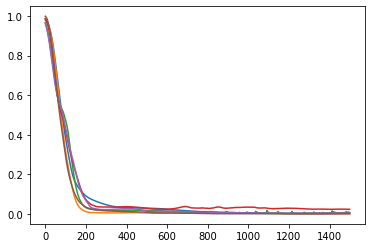

In [1]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit
import time

state_in = np.zeros(100, dtype=np.complex128)
state_in[0] = 1
target_out = np.zeros(100, dtype=np.complex128)
target_out[1] = 1

def loss(target, output):
    return  1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target)))**2

for num_seed in [660,661,662,663,664,665]:
    device = Circuit(num_layers=8, num_modes=1, num_seed = num_seed, dtype=tf.complex128)
    tuple_in_out = (state_in,target_out),
    device.set_input_output_pairs(*tuple_in_out)
    start = time.time()
    device.optimize(loss, steps=1500)
    end = time.time()
    print(end - start)

state_in.shape (100,)
self._inout_pairs[0].shape[1] 100


<BarContainer object of 100 artists>

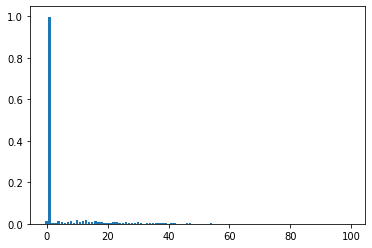

In [4]:
import matplotlib.pyplot as plt
x = np.arange(100)
final_state = device.show_final_state(state_in)
plt.bar(x,tf.abs(final_state))

Output()

loss is: 0.00836215540766716
696.1619017124176


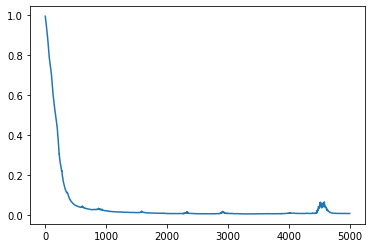

In [7]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros((10,10), dtype=np.complex128)
state_in[0,0] = 1
target_out = np.zeros((10,10), dtype=np.complex128)
target_out[5,0] = 1/np.sqrt(2)
target_out[0,5] = 1/np.sqrt(2)

def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=20, num_modes=2, num_seed = 30, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=5000)
end = time.time()
print(end - start)

In [8]:
device.show_final_state(state_in)

state_in.shape (10, 10)
self._inout_pairs[0].shape[1] 10


array([[ 8.22894811e-05+9.15610048e-04j, -3.15523183e-03+2.10431545e-03j,
        -6.73114623e-03-2.32431910e-04j, -3.59401246e-03+1.44971248e-04j,
        -4.35582167e-03-2.50045045e-03j,  7.06058492e-01-4.61908732e-02j,
        -2.66760620e-03+1.71642982e-03j, -2.40139471e-03-7.07777419e-04j,
         1.21791592e-02-3.57318989e-03j, -4.84918592e-03+8.86877937e-03j],
       [ 1.33464480e-03-3.37800792e-03j,  2.03856837e-03+4.11021877e-03j,
        -1.57194200e-03-5.67031082e-03j, -3.42087906e-03+7.40199706e-03j,
        -1.18155949e-03-1.34534769e-03j,  4.17248155e-03+4.67076070e-04j,
        -4.19771774e-04+3.46931310e-03j,  7.70019641e-03+3.63256043e-04j,
         7.04540940e-04+2.66937381e-03j,  1.37095935e-03-4.13899067e-04j],
       [ 2.42273455e-03+1.91736441e-04j,  2.55989774e-03-1.82208577e-03j,
         8.33453230e-03-7.08316554e-03j,  1.75442093e-03+3.28464889e-03j,
         1.57503427e-03-1.56234647e-04j, -3.67392271e-03+4.61567496e-04j,
        -7.91174201e-03+3.57315882e-

In [2]:
from scipy.special import factorial as fac
def hex_GKP(mu, d, delta, cutoff, nmax=7):
    r"""Hexagonal GKP code state.
    The Hex GKP state is defined by
    .. math::
        |mu> = \sum_{n_1,n_2=-\infty}^\infty e^{-i(q+\sqrt{3}p)/2}
            \sqrt{4\pi/\sqrt{3}d}(dn_1+\mu) e^{iq\sqrt{4\pi/\sqrt{3}d}n_2}|0>
    where d is the dimension of a code space, \mu=0,1,...,d-1, |0> is the
    vacuum state, and the states are modulated by a Gaussian envelope in the
    case of finite energy:
    ..math:: e^{-\Delta ^2 n}|\mu>
    Args:
        d (int): the dimension of the code space.
        mu (int): mu=0,1,...,d-1.
        delta (float): width of the modulating Gaussian envelope.
        cutoff (int): the Fock basis truncation of the returned state vector.
        nmax (int): the Hex GKP state |mu> is calculated by performing the
            sum using n1,n1=-nmax,...,nmax.
    Returns:
        array: a size [cutoff] complex array state vector.
    """
    n1 = np.arange(-nmax, nmax+1)[:, None]
    n2 = np.arange(-nmax, nmax+1)[None, :]

    n1sq = n1**2
    n2sq = n2**2

    sqrt3 = np.sqrt(3)

    arg1 = -1j*np.pi*n2*(d*n1+mu)/d
    arg2 = -np.pi*(d**2*n1sq+n2sq-d*n1*(n2-2*mu)-n2*mu+mu**2)/(sqrt3*d)
    arg2 *= 1-np.exp(-2*delta**2)

    amplitude = (np.exp(arg1)*np.exp(arg2)).flatten()[:, None]

    alpha = np.sqrt(np.pi/(2*sqrt3*d)) * (sqrt3*(d*n1+mu) - 1j*(d*n1-2*n2+mu))
    alpha *= np.exp(-delta**2)

    alpha = alpha.flatten()[:, None]
    n = np.arange(cutoff)[None, :]
    coherent = np.exp(-0.5*np.abs(alpha)**2)*alpha**n/np.sqrt(fac(n))

    hex_state = np.sum(amplitude*coherent, axis=0)
    return hex_state/np.linalg.norm(hex_state)

Output()

loss is: 0.0046299658715724945
414.7360918521881


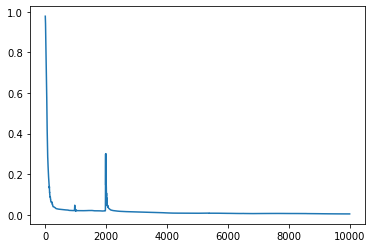

In [13]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit
import time

state_in = np.zeros(50, dtype=np.complex128)
state_in[0] = 1
target_out = hex_GKP(1, 2, 0.3, 50, nmax=7)


def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=25, num_modes=1, num_seed = 52, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=10000)
end = time.time()
print(end - start)

state_in.shape (50,)
self._inout_pairs[0].shape[1] 50


/Users/mac/anaconda3/envs/thewalrusenv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


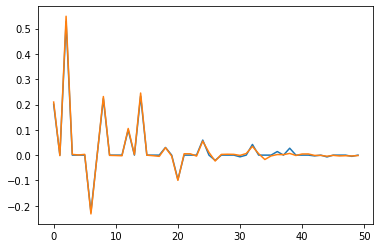

In [14]:
import matplotlib.pyplot as plt
plt.plot(hex_GKP(1, 2, 0.3, 50, nmax=7))
plt.plot(device.show_final_state(state_in))